***PROYECTO MACHINE LEARNING***

***Objetivo:*** Identificar países con alto, medio o bajo riesgo energético basándote en factores como acceso a electricidad, combustibles limpios, uso de energías renovables, etc.

***Salida esperada:*** Una clasificación de países en categorías como "Alto Riesgo", "Medio Riesgo" y "Bajo Riesgo".

***Base de datos:*** https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

___Importamos librerias___

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

___UNA PRIMERA MIRADA AL DATASET___

In [3]:
ruta_base_datos = "/home/dberm23/IA_project/global-data-on-sustainable-energy (1).csv"
data = pd.read_csv(ruta_base_datos)

In [4]:
print(f"Dimensiones de la base de datos: {data.shape}")
data.head()

Dimensiones de la base de datos: (3649, 21)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Verificamos que datos son categoricos y que datos son númericos

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [78]:
print(data.columns.tolist())

['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


In [114]:
# Renombrar la columna para eliminar caracteres problemáticos
data.rename(columns={'Density\\n(P/Km2)': 'Density_PKm2'}, inplace=True)
# Renombrar la columna manualmente
#data.rename(columns={'Density\\n(P/Km2)': 'Density_PKm2'}, inplace=True)

___REALIZAMOS LA LIMPIEZA DE LOS DATOS___

1.Datos faltantes                                  
                     2. Columnas irrelevantes                                                   
                                                 3. Errores tipograficos    

***1. BUSCAMOS COLUMNAS CON DATOS FALTANTES***

In [81]:
buscando_columnas = data.columns[data.isnull().any()]
print(buscando_columnas)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density_PKm2', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


***Estas columnas tienen una relación directa con los factores energéticos, socioeconómicos y geográficos que influyen en el riesgo energético:***

    -Access to electricity (% of population)
        Indicador clave de acceso energético.

    -Access to clean fuels for cooking
        Relacionado con el desarrollo energético y la calidad de vida.

    -Renewable energy share in the total final energy consumption (%)
        Muestra la dependencia de las energías renovables.

    -Electricity from renewables (TWh)
        Importante para evaluar la generación energética sostenible.

    -Electricity from fossil fuels (TWh)
        Indica dependencia de fuentes no renovables.

    -GDP per capita
        Mide el desarrollo económico del país, que puede influir en el acceso energético.

    -Density\n(P/Km2)
        La densidad de población afecta el acceso y demanda energética.

    -Primary energy consumption per capita (kWh/person)
        Indicador del consumo energético.

    -Energy intensity level of primary energy (MJ/$2017 PPP GDP)
        Relacionado con la eficiencia energética.

In [82]:
# Selección de columnas relevantes
columnas_relevantes = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Entity',
    'Electricity from renewables (TWh)',
    'Electricity from fossil fuels (TWh)',
    'gdp_per_capita',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Density_PKm2'
]

# Filtrar dataset
datos_filtrados = data[columnas_relevantes]
print(datos_filtrados)

      Access to electricity (% of population)  \
0                                    1.613591   
1                                    4.074574   
2                                    9.409158   
3                                   14.738506   
4                                   20.064968   
...                                       ...   
3644                                42.561730   
3645                                44.178635   
3646                                45.572647   
3647                                46.781475   
3648                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3644                               29.8   
3645                               29.8   
3646                    

In [83]:
columnas_con_faltantes = datos_filtrados.columns[datos_filtrados.isnull().any()]
print(columnas_con_faltantes)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Electricity from fossil fuels (TWh)', 'gdp_per_capita',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Density_PKm2'],
      dtype='object')


***Eliminamos filas con datos faltantes:***

In [84]:
datos_filtrados = datos_filtrados.dropna()

In [85]:
print(f"Dimensiones de la base de datos filtrada: {datos_filtrados.shape}\n\n\n")
datos_filtrados.info()

Dimensiones de la base de datos filtrada: (3007, 10)



<class 'pandas.core.frame.DataFrame'>
Index: 3007 entries, 2 to 3648
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           3007 non-null   float64
 1   Access to clean fuels for cooking                                 3007 non-null   float64
 2   Renewable energy share in the total final energy consumption (%)  3007 non-null   float64
 3   Entity                                                            3007 non-null   object 
 4   Electricity from renewables (TWh)                                 3007 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3007 non-null   float64
 6   gdp_per_capita                                                    3007 non-nu

 
 
    
     
___datos_filtrados.describe()___                                              
    Genera estadísticas descriptivas para cada columna del DataFrame.                                   
    Incluye métricas como:                                                   
        ***count:*** Número de valores no nulos.                                                          
        ***mean:*** Promedio.                                                                              
        ***std:*** Desviación estándar.                                                                         
        ***min:*** Valor mínimo.                                                                    
        ***25%:*** Primer cuartil (percentil 25).                                                             
        ***50%:*** Mediana (percentil 50).                                                                      
        ***75%:*** Tercer cuartil (percentil 75).                                                            
        ***max:*** Valor máximo.                                                                             

In [86]:
datos_filtrados.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh),Electricity from fossil fuels (TWh),gdp_per_capita,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP)
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,77.324505,62.835085,34.944603,26.261068,78.245653,12381.281248,26269.517289,5.399991
std,31.152165,39.172898,29.809068,105.241409,366.182158,18365.551065,36756.651912,3.518044
min,1.252269,0.000000,0.000000,0.000000,0.000000,111.927225,105.110120,1.030000
25%,55.826718,22.450000,8.815000,0.090000,0.310000,1248.575748,2984.557000,3.300000
50%,97.500000,82.900000,28.150000,1.840000,3.420000,4258.978767,12649.783000,4.420000
75%,100.000000,100.000000,58.470000,11.195000,30.650000,14404.430050,32461.800500,6.080000
max,100.000000,100.000000,96.040000,2014.570000,5098.220000,123514.196700,262585.700000,32.570000


***Revisión de filas repetidas:***

In [133]:
datos_filtrados.drop_duplicates(inplace=True)
print(f"Nueva dimensión del Dataframe: {datos_filtrados.shape}")

Nueva dimensión del Dataframe: (3007, 10)


Sin filas repetidas

***limpieza de outliers usando zscore:***

El z-score mide la desviación de un valor respecto a la media en términos de desviaciones estándar. Los valores con un z-score absoluto mayor a un umbral (como 3) suelen considerarse outliers.

In [118]:
print(datos_filtrados['Density_PKm2'].unique())

['60' '18' '26' '223' '17' '104' '3' '109' '123' '2,239' '1,265' '668'
 '47' '383' '108' '20' '64' '4' '25' '76' '463' '95' '56' '8' '13' '153'
 '46' '467' '100' '73' '106' '131' '137' '43' '96' '225' '71' '313' '50'
 '35' '31' '67' '115' '49' '119' '9' '57' '240' '81' '331' '167' '53' '70'
 '414' '89' '107' '464' '151' '93' '400' '206' '273' '347' '7' '94' '147'
 '30' '242' '48' '203' '99' '1,802' '1,380' '5' '626' '66' '2' '83' '40'
 '541' '508' '55' '19' '226' '15' '16' '287' '58' '368' '124' '111' '248'
 '84' '525' '87' '214' '8,358' '103' '341' '219' '68' '152' '110' '229'
 '75' '118' '281' '36' '79' '38']


In [131]:
datos_filtrados['Density_PKm2'] = pd.to_numeric(datos_filtrados['Density_PKm2'], errors='coerce')

In [134]:
#Verificar solo los datos númericos para no tener errores de tipo
datos_numericos = datos_filtrados.select_dtypes(include=['float64', 'int64'])

#Aplicar zscores
z_scores=datos_numericos.apply(zscore)

# Filtrar valores dentro de 3 desviaciones estándar
datos_sin_outliers = datos_numericos[(z_scores < 3).all(axis=1)]

datos_sin_outliers.info()

print(f"\n\nDimensión de Dataframe eliminando valores: {datos_sin_outliers.shape} ")

<class 'pandas.core.frame.DataFrame'>
Index: 2674 entries, 2 to 3648
Data columns (total 9 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           2674 non-null   float64
 1   Access to clean fuels for cooking                                 2674 non-null   float64
 2   Renewable energy share in the total final energy consumption (%)  2674 non-null   float64
 3   Electricity from renewables (TWh)                                 2674 non-null   float64
 4   Electricity from fossil fuels (TWh)                               2674 non-null   float64
 5   gdp_per_capita                                                    2674 non-null   float64
 6   Primary energy consumption per capita (kWh/person)                2674 non-null   float64
 7   Energy intensity level of primary energ

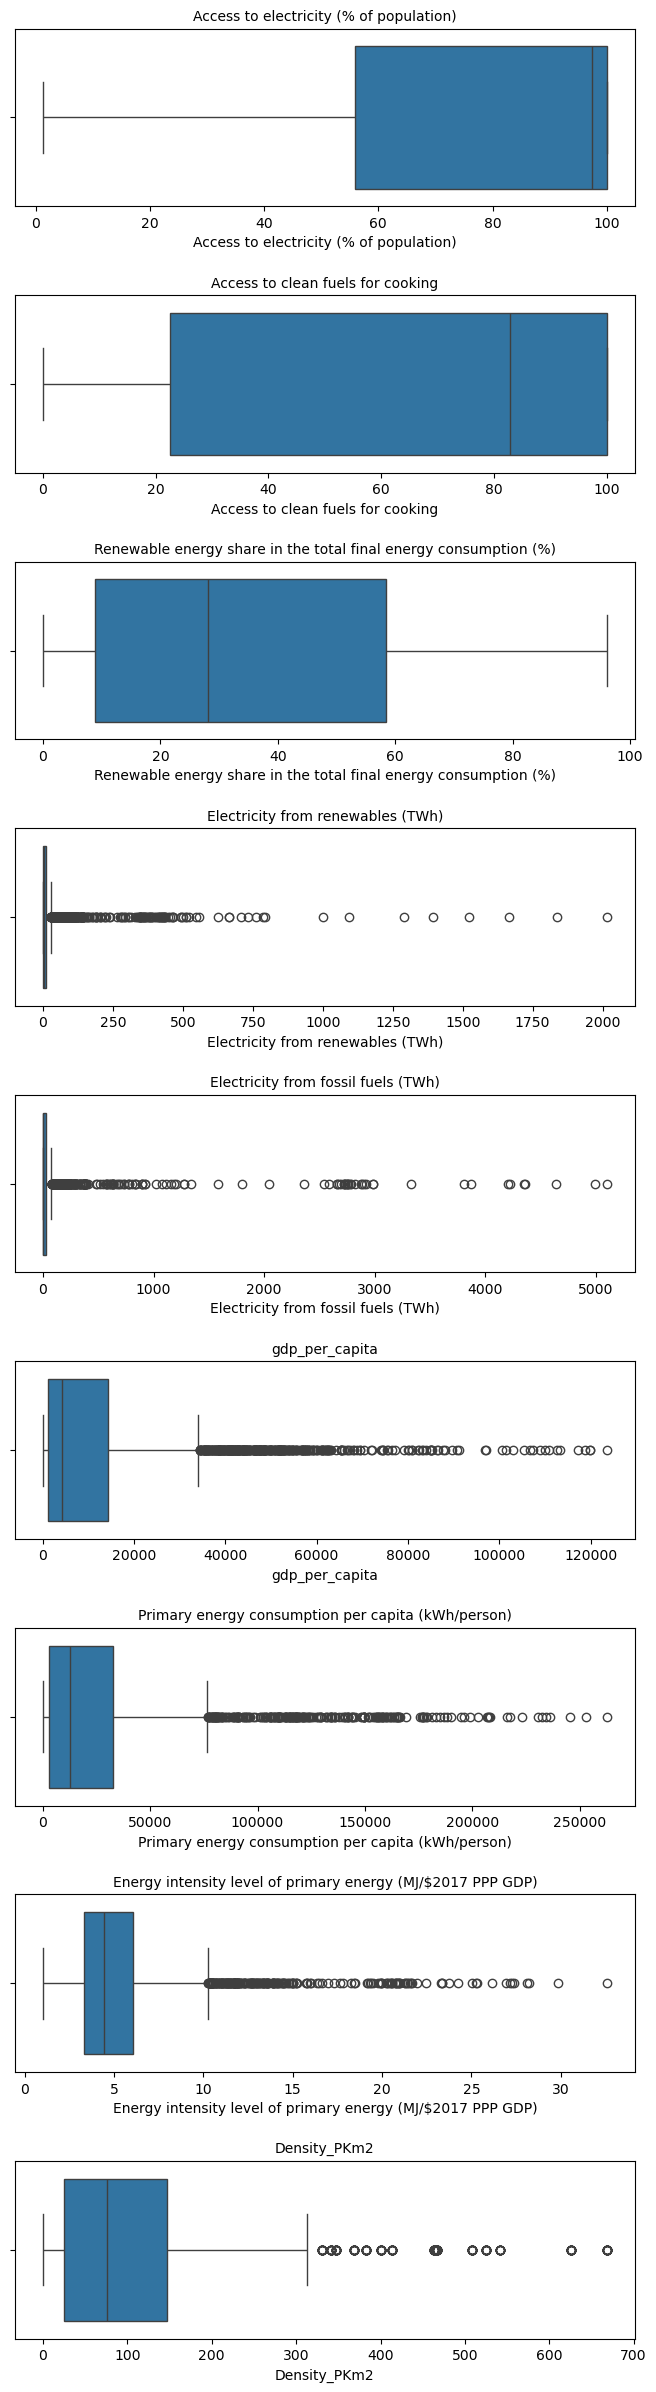

In [135]:
# Crear subgráficos para cada columna del DataFrame para visualización de outliers
num_columns = len(datos_numericos.columns)  # Contar el número de columnas
fig, ax = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 30))  # Ajustar nrows al número de columnas
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio vertical entre gráficos

# Crear boxplots para cada columna
for i, col in enumerate(datos_sin_outliers.columns):
    sns.boxplot(x=datos_numericos[col], ax=ax[i])  # Asignar cada gráfico al eje correspondiente
    ax[i].set_title(col, fontsize=10)  # Añadir título a cada gráfico

plt.show()

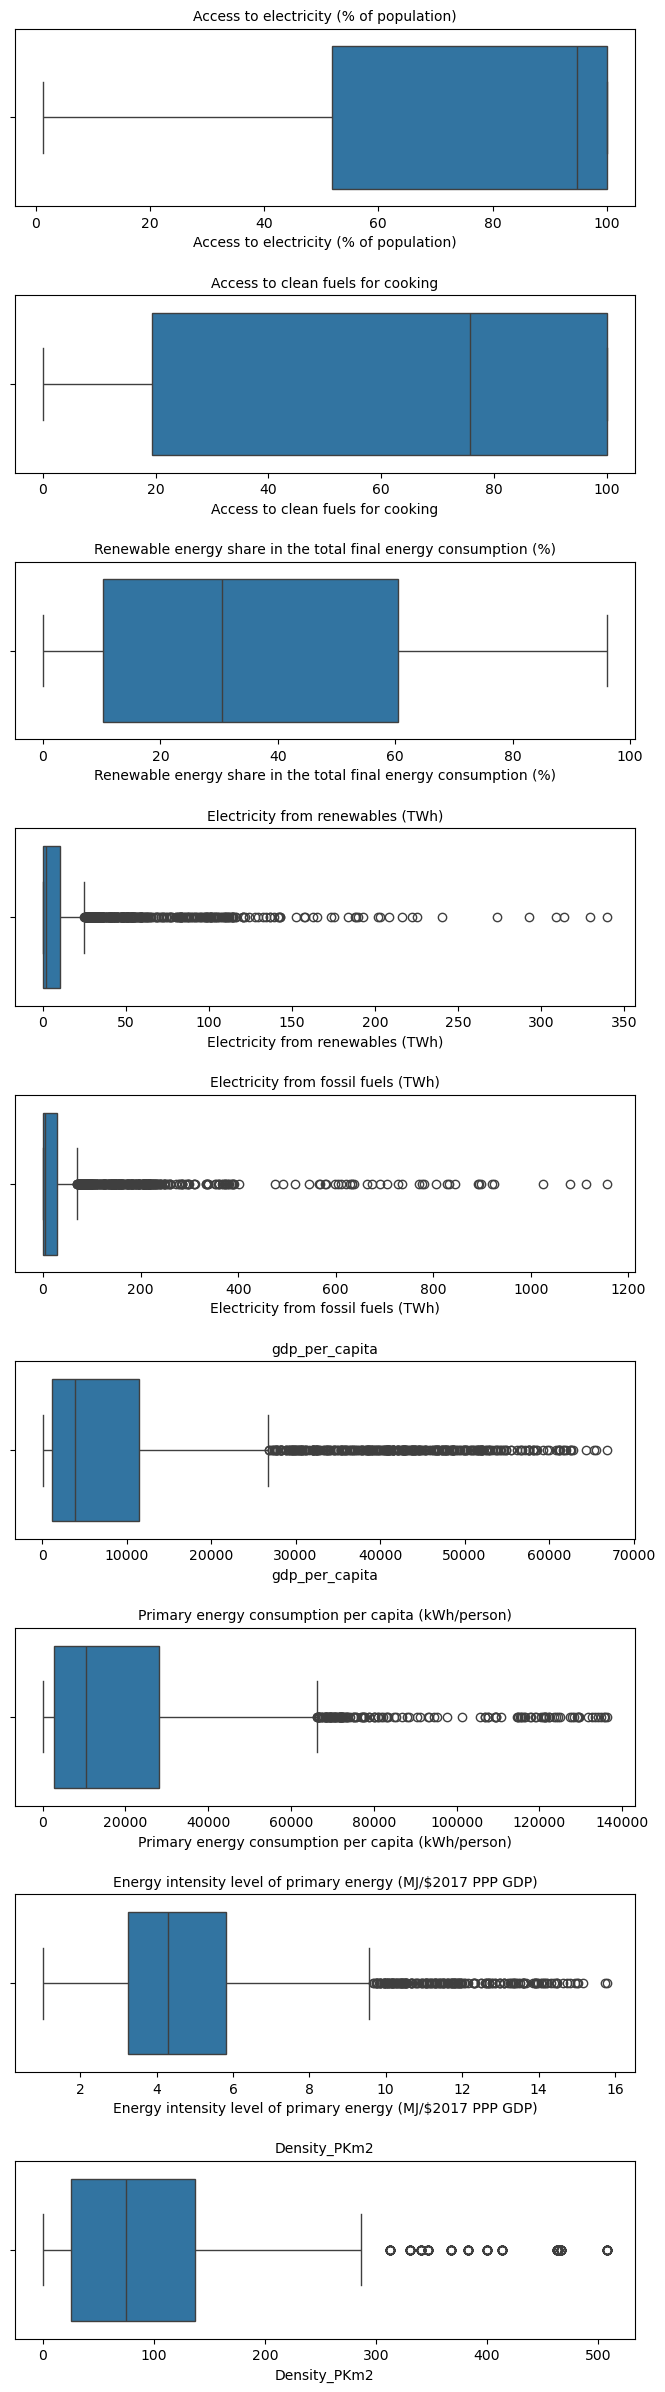

In [136]:
# Crear subgráficos para cada columna del DataFrame limpio de outliers
num_columns = len(datos_sin_outliers.columns)  # Contar el número de columnas
fig, ax = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 30))  # Ajustar nrows al número de columnas
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio vertical entre gráficos

# Crear boxplots para cada columna
for i, col in enumerate(datos_sin_outliers.columns):
    sns.boxplot(x=datos_sin_outliers[col], ax=ax[i])  # Asignar cada gráfico al eje correspondiente
    ax[i].set_title(col, fontsize=10)  # Añadir título a cada gráfico

plt.show()

In [137]:
print("Índices de datos_filtrados:", datos_filtrados.index)
print("Índices de datos_sin_outliers:", datos_sin_outliers.index)

Índices de datos_filtrados: Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
       ...
       3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
      dtype='int64', length=3007)
Índices de datos_sin_outliers: Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
       ...
       3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
      dtype='int64', length=2674)


In [138]:
# Asignar la columna 'Entity' utilizando el método .loc para evitar el warning
datos_sin_outliers.loc[:, 'Entity'] = datos_filtrados.loc[datos_sin_outliers.index, 'Entity'].values


print(datos_sin_outliers.head())

   Access to electricity (% of population)  Access to clean fuels for cooking  \
2                                 9.409158                               8.20   
3                                14.738506                               9.50   
4                                20.064968                              10.90   
5                                25.390894                              12.20   
6                                30.718690                              13.85   

   Renewable energy share in the total final energy consumption (%)  \
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  

   Electricity from renewables (TWh)  Electricity from fossil fuels (TWh)  \
2        

/tmp/ipykernel_2782/1021551844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_sin_outliers.loc[:, 'Entity'] = datos_filtrados.loc[datos_sin_outliers.index, 'Entity'].values


Con esto concluimos la limpieza de outlier (Datos con valores extremos)

***Algunas variables, como gdp_per_capita o Primary energy consumption per capita, podrían beneficiarse de una transformación logarítmica si su distribución sigue estando muy sesgada después de la limpieza. Esto podría ayudar a mejorar el rendimiento de modelos predictivos.***

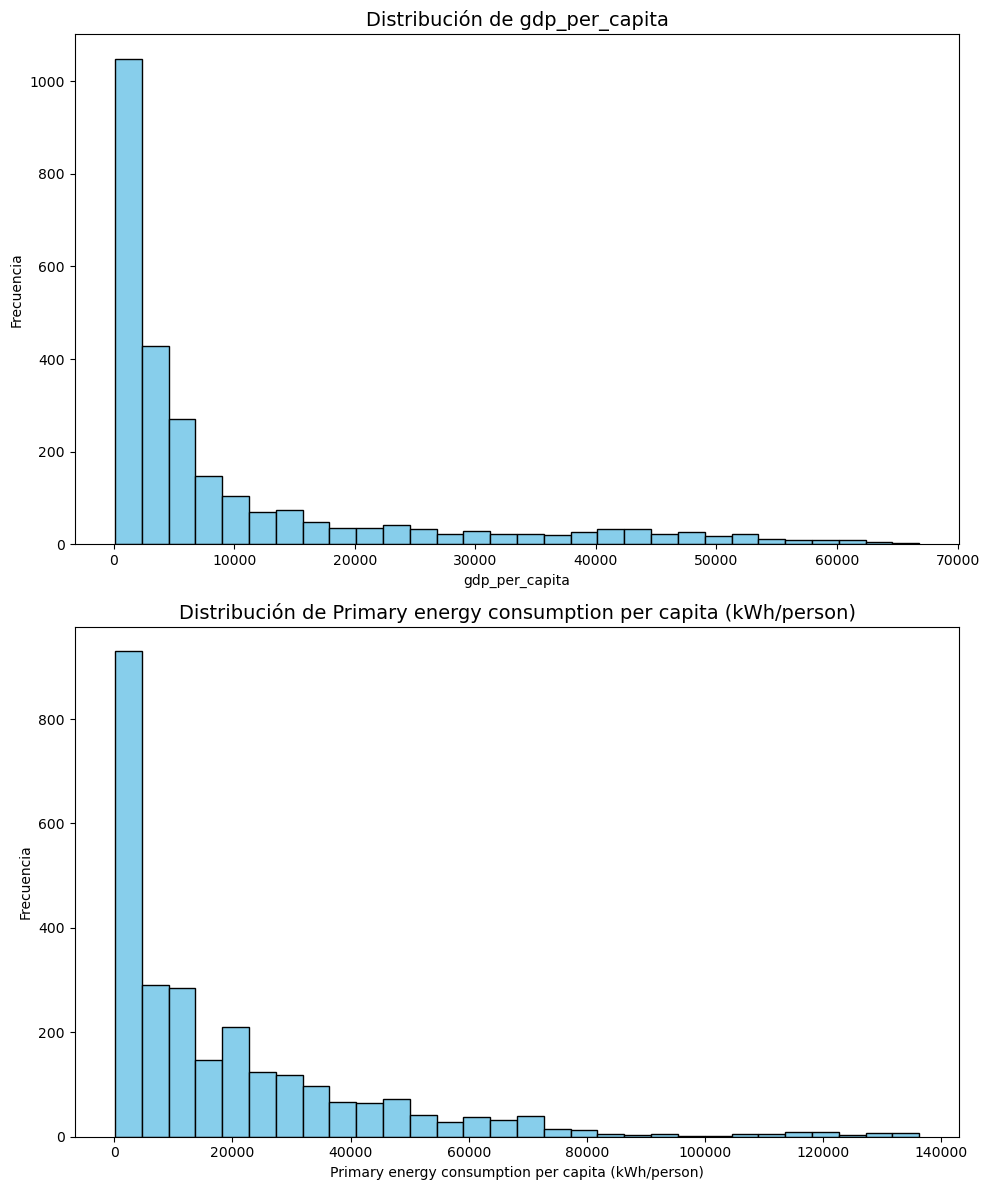

In [139]:
# Seleccionar las columnas relevantes para analizar distribuciones
variables_a_analizar = ['gdp_per_capita', 'Primary energy consumption per capita (kWh/person)']

# Crear histogramas para cada variable
fig, ax = plt.subplots(len(variables_a_analizar), 1, figsize=(10, 6 * len(variables_a_analizar)))

for i, col in enumerate(variables_a_analizar):
    ax[i].hist(datos_sin_outliers[col], bins=30, color='skyblue', edgecolor='black')
    ax[i].set_title(f"Distribución de {col}", fontsize=14)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Interpretación de los histogramas                                                                                   
                                    
    gdp_per_capita:                                                                                                                       
        La mayoría de los países tienen un PIB per cápita bajo, con unos pocos países alcanzando valores extremadamente altos.
        Este sesgo podría impactar negativamente los modelos predictivos si no se normaliza.                                                    
                           
    Primary energy consumption per capita (kWh/person):                                                                        
        El consumo de energía primaria por persona está igualmente sesgado, lo que sugiere que unos pocos países tienen un consumo mucho  más elevado que el resto.

***Aplicar la transformación logarítmica***

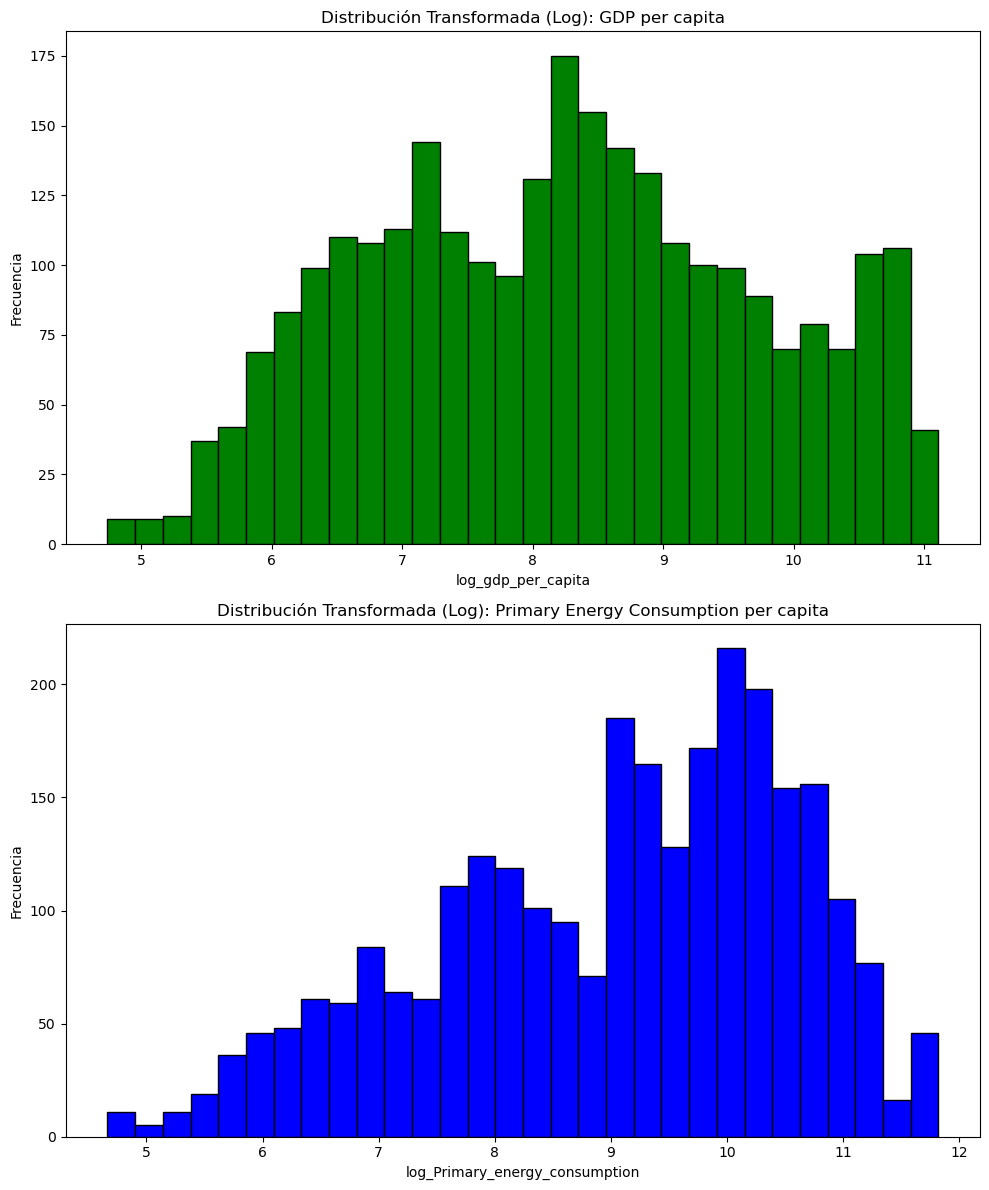

In [97]:
# Asegurarte de trabajar con una copia del DataFrame
datos_sin_outliers = datos_sin_outliers.copy()

# Aplicar transformación logarítmica
datos_sin_outliers['log_gdp_per_capita'] = np.log(datos_sin_outliers['gdp_per_capita'] + 1)
datos_sin_outliers['log_Primary_energy_consumption'] = np.log(datos_sin_outliers['Primary energy consumption per capita (kWh/person)'] + 1)

# Visualizar las distribuciones transformadas
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Histograma para gdp_per_capita transformado
ax[0].hist(datos_sin_outliers['log_gdp_per_capita'], bins=30, color='green', edgecolor='black')
ax[0].set_title("Distribución Transformada (Log): GDP per capita")
ax[0].set_xlabel("log_gdp_per_capita")
ax[0].set_ylabel("Frecuencia")

# Histograma para Primary energy consumption per capita transformado
ax[1].hist(datos_sin_outliers['log_Primary_energy_consumption'], bins=30, color='blue', edgecolor='black')
ax[1].set_title("Distribución Transformada (Log): Primary Energy Consumption per capita")
ax[1].set_xlabel("log_Primary_energy_consumption")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Distribución de gdp_per_capita:

    Después de la transformación logarítmica, los datos son más simétricos y presentan una forma más cercana a una distribución normal.
    Esto es ideal para modelos de machine learning que asumen normalidad o se benefician de datos más balanceados.

Distribución de Primary energy consumption per capita:

    Similarmente, la transformación logarítmica ha reducido el sesgo positivo, haciendo que la distribución sea más manejable y útil para los modelos predictivos.

***Calcular la matriz de correlación***

La matriz de correlación muestra cómo las variables numéricas están relacionadas entre sí.

In [140]:
# Filtrar solo las columnas numéricas
datos_numericos = datos_sin_outliers.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = datos_numericos.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                                                    Access to electricity (% of population)  \
Access to electricity (% of population)                                            1.000000   
Access to clean fuels for cooking                                                  0.862357   
Renewable energy share in the total final energ...                                -0.782362   
Electricity from renewables (TWh)                                                  0.247029   
Electricity from fossil fuels (TWh)                                                0.227988   
gdp_per_capita                                                                     0.470553   
Primary energy consumption per capita (kWh/person)                                 0.543986   
Energy intensity level of primary energy (MJ/$2...                                -0.416681   
Density_PKm2                                                                       0.057335   

                                                 

***Variables con alta correlación (mayor a 0.8)***

Estas variables muestran una relación muy fuerte entre sí y podrían generar redundancias o problemas de multicolinealidad en los modelos:

    Access to electricity (% of population) y Access to clean fuels for cooking: Correlación de 0.865920.                 
                                   
    log_gdp_per_capita y log_Primary_energy_consumption: Correlación de 0.891340.                       
                                                
    gdp_per_capita y Primary energy consumption per capita (kWh/person): Correlación de 0.777362 (considerada alta, aunque menor a 0.8).

In [141]:
print(datos_sin_outliers.columns)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Electricity from fossil fuels (TWh)', 'gdp_per_capita',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Density_PKm2', 'Entity'],
      dtype='object')


In [143]:
# Eliminar la columna 'Access to electricity (% of population)'
#datos_sin_outliers.drop(columns=['Access to electricity (% of population)'], inplace=True)

#Eliminar la columna 'log_Primary_energy_consumption'
#datos_sin_outliers.drop(columns=['log_gdp_per_capita'], inplace=True)

In [144]:
columnas_numericas = datos_sin_outliers.select_dtypes(include=['number'])
updated_correlation_matrix = columnas_numericas.corr()

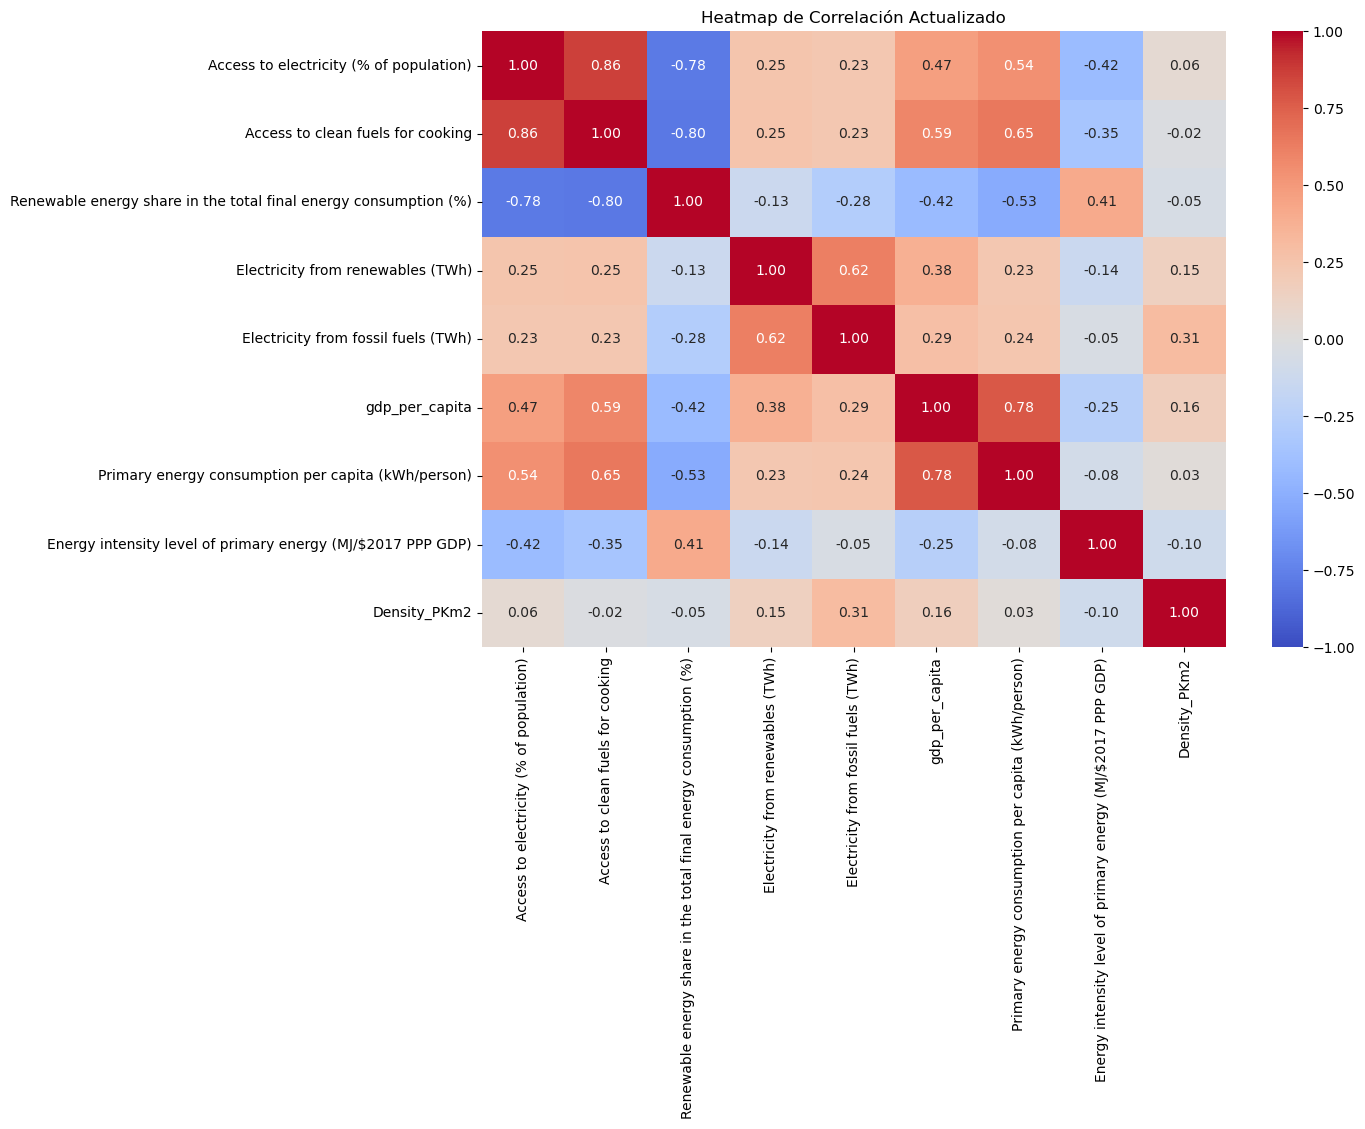

In [145]:
plt.figure(figsize=(12, 8))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmap de Correlación Actualizado")
plt.show()

___INGENIERIA DE CARACTERISTICAS:___

1. Creación de Nuevas Variables

    -Razón entre Energía Renovable y Fósil

    Esta variable permitirá analizar la relación entre la generación de energía renovable y la dependencia de combustibles fósiles.

In [146]:
# Crear la variable 'ratio_renewable_fossil'
datos_sin_outliers['ratio_renewable_fossil'] = (
    datos_sin_outliers['Electricity from renewables (TWh)'] /
    datos_sin_outliers['Electricity from fossil fuels (TWh)']
)

# Reemplazar valores infinitos o nulos por 0 sin usar inplace
datos_sin_outliers['ratio_renewable_fossil'] = datos_sin_outliers['ratio_renewable_fossil'].replace(
    [float('inf'), -float('inf')], 0
)

datos_sin_outliers['ratio_renewable_fossil'] = datos_sin_outliers['ratio_renewable_fossil'].fillna(0)


    -Densidad Energética

    calcular la densidad energética dividiendo el consumo energético per cápita entre la densidad poblacional.

In [148]:
# Verificar si la columna 'Density_PKm2' está disponible
if 'Density_PKm2' in datos_sin_outliers.columns:
    # Crear la variable 'energy_density'
    datos_sin_outliers['energy_density'] = (
        datos_sin_outliers['Primary energy consumption per capita (kWh/person)'] / 
        datos_sin_outliers['Density_PKm2']
    )

    # Reemplazar valores infinitos o nulos por 0 (sin inplace)
    datos_sin_outliers['energy_density'] = datos_sin_outliers['energy_density'].replace([float('inf'), -float('inf')], 0)
    datos_sin_outliers['energy_density'] = datos_sin_outliers['energy_density'].fillna(0)
else:
    print("La columna 'Density_PKm2' no está disponible para calcular la densidad energética.")


In [150]:
print(datos_sin_outliers.columns)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Electricity from fossil fuels (TWh)', 'gdp_per_capita',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Density_PKm2', 'Entity', 'ratio_renewable_fossil', 'energy_density'],
      dtype='object')


    2. Reducción de dimensionalidad con PCA:

Normalización de los Datos

El PCA requiere que las variables estén en la misma escala. Usa StandardScaler de sklearn para normalizar los datos numéricos.

In [157]:
# Seleccionar las columnas numéricas para PCA
columnas_numericas = datos_sin_outliers.select_dtypes(include=['float64', 'int64']).columns

# Normalizar los datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_sin_outliers[columnas_numericas])

Usamos la clase PCA de sklearn para reducir la dimensionalidad.

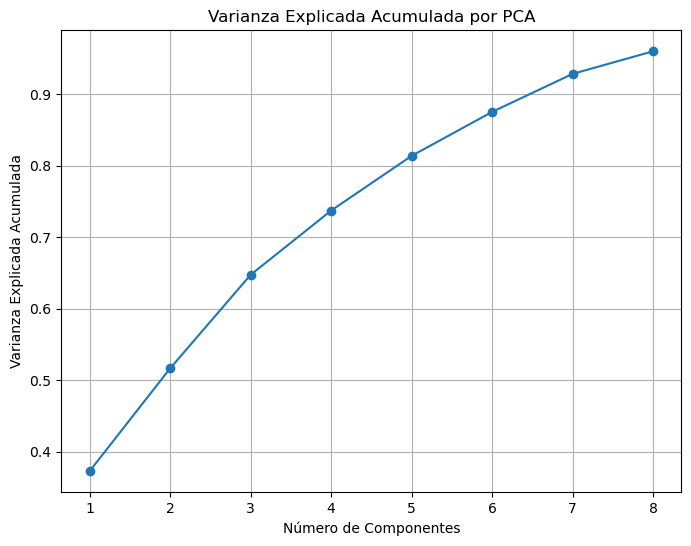

In [161]:
# Inicializar PCA y especificar el número de componentes
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
datos_pca = pca.fit_transform(datos_normalizados)

# Ver la varianza explicada por componente
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Varianza Explicada Acumulada por PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid()
plt.show()

Crear un Nuevo DataFrame con las Componentes Principales

In [162]:
# Crear DataFrame con las componentes principales
columnas_pca = [f'PC{i+1}' for i in range(datos_pca.shape[1])]
datos_pca_df = pd.DataFrame(datos_pca, columns=columnas_pca)

# Agregar columnas categóricas o identificadores si es necesario
if 'Entity' in datos_sin_outliers.columns:
    datos_pca_df['Entity'] = datos_sin_outliers['Entity']


In [168]:
print(datos_sin_outliers.head())
print(datos_pca_df.head())

   Access to electricity (% of population)  Access to clean fuels for cooking  \
2                                 9.409158                               8.20   
3                                14.738506                               9.50   
4                                20.064968                              10.90   
5                                25.390894                              12.20   
6                                30.718690                              13.85   

   Renewable energy share in the total final energy consumption (%)  \
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  

   Electricity from renewables (TWh)  Electricity from fossil fuels (TWh)  \
2        

In [173]:
print(datos_sin_outliers.columns.tolist())

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from renewables (TWh)', 'Electricity from fossil fuels (TWh)', 'gdp_per_capita', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Density_PKm2', 'Entity', 'ratio_renewable_fossil', 'energy_density']


***Definir las categorías de riesgo energético:***

Usaremos una variable existente en el DataFrame para clasificar los países (Primary energy consumption per capita (kWh/person))
Podemos categorizar los valores en rangos como "Bajo", "Medio" y "Alto".

Creamos las etiquetas para la clasificación:                                                     
pd.cut para asignar categorias 

In [178]:
etiquetas_riesgo = pd.cut(
    datos_sin_outliers['Primary energy consumption per capita (kWh/person)'],
    bins=[0, 200, 500, float('inf')],  # Define los límites de los rangos
    labels=['Bajo', 'Medio', 'Alto']   # Define las etiquetas
)

print(etiquetas_riesgo.value_counts())


Primary energy consumption per capita (kWh/person)
Alto     2542
Medio     111
Bajo       21
Name: count, dtype: int64


***Dividir los Datos***

Dividiremos los datos en conjuntos de entrenamiento y prueba (80%-20%) para evaluar el rendimiento general de los modelos. Esto lo haremos con la función train_test_split de sklearn.

In [182]:
X = datos_pca_df.drop(columns=['Entity'])
y = etiquetas_riesgo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
print(datos_sin_outliers.columns)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Electricity from fossil fuels (TWh)', 'gdp_per_capita',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Density_PKm2', 'Entity', 'ratio_renewable_fossil', 'energy_density'],
      dtype='object')


***Entrenamos modelo (Random forest)***

In [185]:
# Crear y entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicción
y_pred = rf_model.predict(X_test)

***Evaluación modelo (Random forest)***

In [189]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Imprimir métricas
print(f"Accuracy: {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(report)

Accuracy: 0.9850467289719627
Matriz de Confusión:
[[507   0   0]
 [  0   2   4]
 [  4   0  18]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.99      1.00      1.00       507
        Bajo       1.00      0.33      0.50         6
       Medio       0.82      0.82      0.82        22

    accuracy                           0.99       535
   macro avg       0.94      0.72      0.77       535
weighted avg       0.99      0.99      0.98       535



In [190]:
# Calcular ROC-AUC con promedio para problemas multiclase
y_prob = rf_model.predict_proba(X_test)  # Probabilidades para cada clase
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # o 'ovo'
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.997427353368464


/home/dberm23/anaconda3/envs/entorno_prueba/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/dberm23/anaconda3/envs/entorno_prueba/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/dberm23/anaconda3/envs/entorno_prueba/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


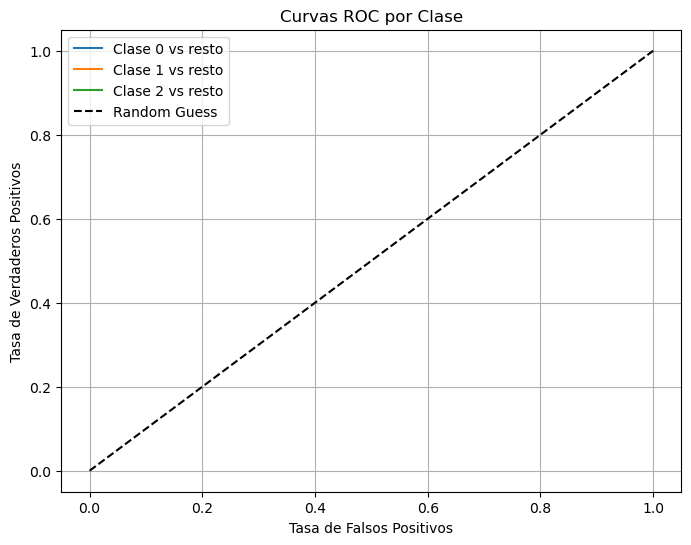

In [192]:
fpr = {}
tpr = {}
for i in range(len(rf_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])

# Plot para cada clase
plt.figure(figsize=(8, 6))
for i in fpr:
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} vs resto")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("Curvas ROC por Clase")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.grid()
plt.show()

In [193]:
print(y_test.value_counts())

Primary energy consumption per capita (kWh/person)
Alto     507
Medio     22
Bajo       6
Name: count, dtype: int64


Se evidencia un desbalance en las clases significativo, se usara SMOTE para generar muestras sintéticas de las clases minoritarias.

***SMOTE para generar muestras sintéticas de las clases minoritarias.***

In [197]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

***Submuestreo de la Clase Mayoritaria: Reduce el número de muestras de la clase "Alto" para equilibrar con las demás clases.***

In [199]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

***Combinar Sobremuestreo y Submuestreo: Usamos técnicas híbridas para equilibrar las clases.***

In [201]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

Estratificación en la División:                                  
stratify=y en train_test_split para mantener proporciones similares en los conjuntos de entrenamiento y prueba.

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

***Ajustar los Pesos del Modelo:***

In [204]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [207]:
print(y_test.value_counts())

Primary energy consumption per capita (kWh/person)
Alto     509
Medio     22
Bajo       4
Name: count, dtype: int64


***Modelo de árbol de decisión***

In [212]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

***Definir y Entrenar el Modelo***

In [214]:
# Crear el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [216]:
# Predicciones sobre los datos de prueba
y_pred = dt_model.predict(X_test)

In [219]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy}")
print("Matriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(report)

Accuracy: 0.9850467289719627
Matriz de Confusión:
[[506   0   3]
 [  0   3   1]
 [  3   1  18]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.99      0.99      0.99       509
        Bajo       0.75      0.75      0.75         4
       Medio       0.82      0.82      0.82        22

    accuracy                           0.99       535
   macro avg       0.85      0.85      0.85       535
weighted avg       0.99      0.99      0.99       535



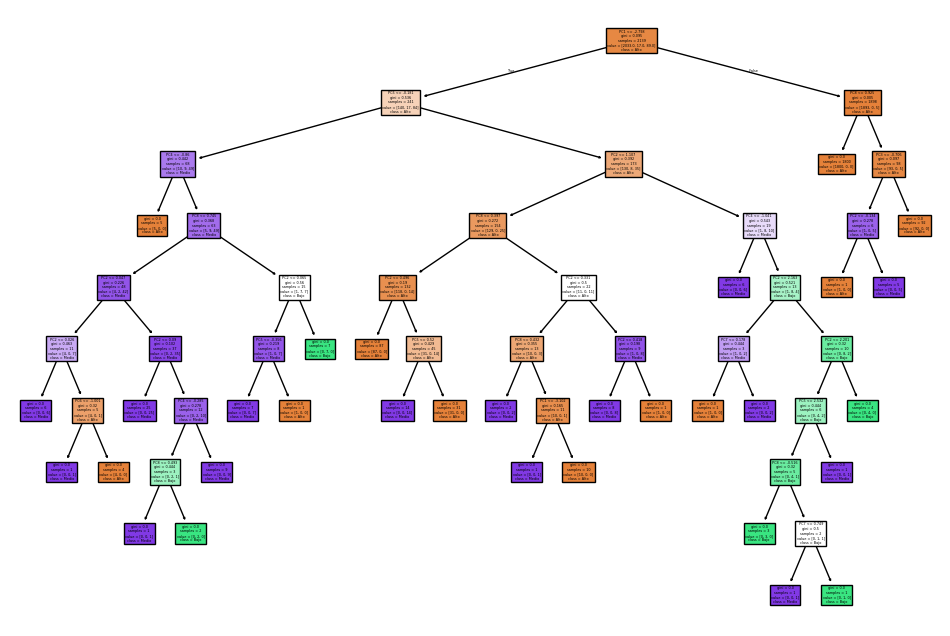

In [220]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X_train.columns, class_names=dt_model.classes_, filled=True)
plt.show()

***Ajuste de parametros importantes***

In [223]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

In [224]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto de GridSearch
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)

Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
